In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('earthquake.csv')

In [3]:
data.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 17 columns):
id           24007 non-null float64
date         24007 non-null object
time         24007 non-null object
lat          24007 non-null float64
long         24007 non-null float64
country      24007 non-null object
city         11754 non-null object
area         12977 non-null object
direction    10062 non-null object
dist         10062 non-null float64
depth        24007 non-null float64
xm           24007 non-null float64
md           24007 non-null float64
richter      24007 non-null float64
mw           5003 non-null float64
ms           24007 non-null float64
mb           24007 non-null float64
dtypes: float64(11), object(6)
memory usage: 3.1+ MB


In [8]:
data.describe()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [23]:
data.columns

Index(['id', 'date', 'time', 'lat', 'long', 'country', 'city', 'area',
       'direction', 'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb'],
      dtype='object')

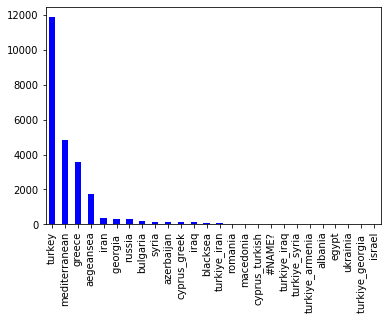

In [60]:
data.country.value_counts().plot(kind='bar', color='blue')

We can see that Turkey faced the highest number of earthquakes, whereas Israel experienced the least. 


In [26]:
data.drop(columns=['id']).corr()

,lat,long,dist,depth,xm,md,richter,mw,ms,mb
lat,1.000000,0.232346,0.079336,-0.241904,-0.010347,0.051100,-0.032155,0.040614,0.056228,0.015019
long,0.232346,1.000000,0.028332,-0.064886,0.071856,0.107302,-0.140393,0.103712,0.043574,0.003432
dist,0.079336,0.028332,1.000000,0.028694,0.004511,-0.004314,0.006295,-0.011798,-0.009058,-0.000091
depth,-0.241904,-0.064886,0.028694,1.000000,0.302926,0.042542,0.150559,0.215900,0.260246,0.313953
xm,-0.010347,0.071856,0.004511,0.302926,1.000000,0.241432,0.426653,0.781860,0.699579,0.628382
md,0.051100,0.107302,-0.004314,0.042542,0.241432,1.000000,-0.237586,0.623224,0.461104,-0.022863
richter,-0.032155,-0.140393,0.006295,0.150559,0.426653,-0.237586,1.000000,0.447001,0.419664,0.240694
mw,0.040614,0.103712,-0.011798,0.215900,0.781860,0.623224,0.447001,1.000000,0.640529,0.628503
ms,0.056228,0.043574,-0.009058,0.260246,0.699579,0.461104,0.419664,0.640529,1.000000,0.588919
mb,0.015019,0.003432,-0.000091,0.313953,0.628382,-0.022863,0.240694,0.628503,0.588919,1.000000


This shows us the correlation between different features of the data.
We can also plot these using a heatmap.

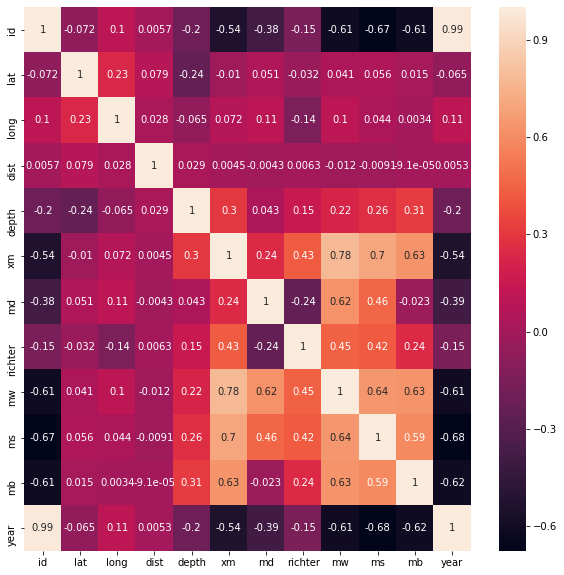

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

To check which year had the maximum number of earthquakes, we will have to extract another columbn called year from the dataframe


In [33]:
def getYear(x):
    return x[0:4]

In [44]:
data['year'] = data['date'].apply(getYear)
data['year'] = data['year'].astype(int)

In [45]:
data.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,year
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0,2003
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0,2007
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7,1978
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0,1997
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0,2000


In [46]:
data.drop(columns=['date', 'time'])

,id,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,year
0,2.000000e+13,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0,2003
1,2.010000e+13,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0,2007
2,1.980000e+13,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7,1978
3,2.000000e+13,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0,1997
4,2.000000e+13,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,2.020000e+13,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0,2017
24003,2.020000e+13,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0,2017
24004,2.020000e+13,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0,2017
24005,2.020000e+13,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0,2017


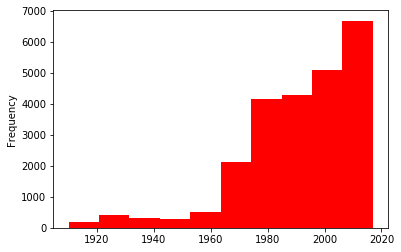

In [62]:
data.year.plot(kind='hist', color='red')
plt.show()

Let's see what was the highest richter value frequency

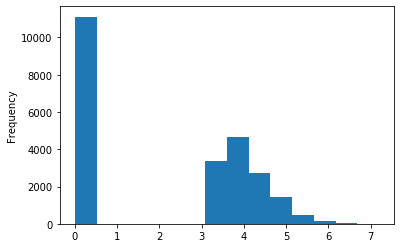

In [82]:
data.richter.plot(kind='hist', bins=14)
plt.show()

As per the given data, the richter value for the earthquakes never exceeded 7. While most of the earthquakes were around 0 to 0.5

Let's see how long did the earthquakes generally last

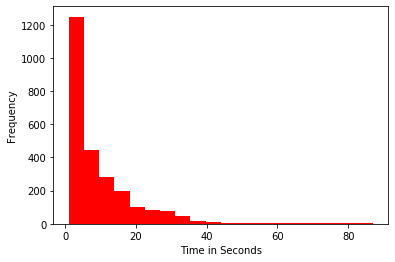

In [83]:
data.long.value_counts().plot(kind='hist', color='red', label='Time Lasted', bins=20)
plt.xlabel('Time in Seconds')
plt.show()

Most Earthquakes only lasted between 0 to 40 seconds. 

Let's find the most severe earthquake that occured. The impact of an earthquake is measured in richter scales. Therefore we extract the data with the highest richter scale measurement

In [86]:
highest_impact = data[data['richter'] == data['richter'].max()]

In [89]:
highest_impact

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,year
6717,1.940000e+13,1939.12.26,12:57:21 AM,39.8,39.51,turkey,erzincan,kurutilek,north_east,3.0,20.0,7.9,7.2,7.2,7.7,7.9,7.1,1939
